<a href="https://colab.research.google.com/github/jorgel-mendes/Portifolio_Recommender_Codenation/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória desafio final codenation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
market_initial = pd.read_csv("/content/drive/My Drive/Codenation_DS_2/Desafio_Final/estaticos_market.csv")
portifolio1 = pd.read_csv("/content/drive/My Drive/Codenation_DS_2/Desafio_Final/estaticos_portfolio1.csv")
portifolio2 = pd.read_csv("/content/drive/My Drive/Codenation_DS_2/Desafio_Final/estaticos_portfolio2.csv")
portifolio3 = pd.read_csv("/content/drive/My Drive/Codenation_DS_2/Desafio_Final/estaticos_portfolio3.csv")

In [ ]:
market_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float64(144), int64(2), object(27)
memory usage: 614.1+ MB


In [ ]:
market_initial.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,NaN,NaN,NaN,NaN,True,8.0,0.0,0.0,NaN,NaN,NaN,False,RN,VERDE,ACIMA DE 1 ANO,...,3132172.8,3132172.8,119.0,26.0,100.0,0.0,NaN,1.0,4.0,6.0,5.0,3.0,4.0,2.0,NaN,1.0,NaN,1.0,25.0,NaN,NaN,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,PI,CINZA,ATE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,True,AM,AMARELO,ACIMA DE 1 ANO,...,50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,False,AM,AMARELO,ACIMA DE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,NaN,NaN,NaN,NaN

In [ ]:
market_initial.describe(include="all")

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.00000,462298,462298,462298,462298,462298,462298,460371,462298.000000,462298,462298,462298,462298,462298,462298,462292,462298,462298,462298,462298,460371,460371,460371,460371,460371,280.000000,176.000000,30684.000000,30684.000000,379585,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,379585,460359,447447,447447,...,4.347850e+05,4.347850e+05,115254.000000,1.152630e+05,75942.000000,75942.000000,2906.000000,25890.000000,38895.000000,40143.000000,36729.000000,30408.000000,24290.000000,19037.000000,13975.000000,11026.000000,1884.000000,24896.000000,67797.000000,22727.000000,0.0,75942.000000,103574.000000,103574.000000,103574.000000,103574.000000,103574.000000,103560.000000,103560.000000,103560.000000,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
unique,NaN,462298,2,67,6,7,33,5,NaN,6,2,2,1,2,2,7334,2,2,2,2,87,21,2,2,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,27,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,c7ce35844785fda3bde6aac530554621a18a6a3506038c...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,NaN,1 a 5,False,False,False,False,False,2005-11-03,False,False,True,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,MA,VERDE,ACIMA DE 1 ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,433232,295756,127654,320211,172404,211224,NaN,138580,461083,453866,462298,311398,461056,69465,462230,256228,335468,236779,172404,211224,460091,457095,429687,NaN,NaN,NaN,NaN,199617,NaN,NaN,NaN,NaN,NaN,NaN,285545,124823,145430,378896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,231148.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.948677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.014286,3.818182,2.244329,1.177813,NaN,5.769044,3.591801,48.699177,134.597159,15.934524,15.892131,NaN,NaN,NaN,NaN,...,8.020911e+05,3.367205e+08,24.838418,1.109122e+04,55.699435,44.300577,2.197866,3.544998,4.247384,5.158932,5.634186,5.664661,5.480939,5.758155,6.115063,8.240522,2.248938,8.246465,11.496128,12.3103

* Unnamed e id são colunas sem informação.
* de_natureza_juridica é categórica
* ver de_natureza_juridica x natureza_juridica_macro
* ramo x setor
* idade empresa em anos x categoria
* algumas variáveis fl_ quase n tem termos diferentes
* fl_epp é toda False
* fl_situacao_especial parece ser interessante mas quase não tem valores diferentes
* dt_situação parece fazer pouco sentido pq existem outras variáveis de tempo da empresa
* nm_divisao x nm_segmento
* fl_spa e fl_antt muito poucos valores diferentes. fl veiculo considerada.
* vl_ podem ser descartadas. principalmente as duas primeiras

* não precisa ter percentagem masculino e feminino
* talvez trocar stado por região ou eliminar. Variáveis demais.

Mas antes olhar NAs e valores muito parecidos.

In [ ]:
market = market_initial.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
isna_columns = market.isna().sum().sort_values(ascending=False)
isna_columns = isna_columns[isna_columns > 462298*.80].index

Colunas com mais de 80% de NAs serão retiradas sem consideração. Outras variváveis serão olhadas para análise.

In [ ]:
market.drop(isna_columns, axis=1, inplace=True)

Alguma variável categórica muito dominada por uma categoria?

In [ ]:
market_counts = market.apply(lambda x: pd.value_counts(x).max())

In [ ]:
market.drop(market_counts[market_counts > 462298*.90].index, axis = 1, inplace=True)

#Variáveis numéricas

In [ ]:
market.describe()

,idade_empresa_anos,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_rotatividade
count,462298.000000,417022.000000,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,195115.000000,145029.000000,4.347850e+05,4.347850e+05,115254.000000,1.152630e+05,103574.000000,103574.000000,103574.000000,103574.000000,103574.000000,103560.000000,103560.000000,103560.000000,103574.000000,103574.000000,103574.000000,103574.000000
mean,9.948677,25.007247,1308.005725,1.496326,1.476681,0.019645,42.816452,44.344131,41.355225,1.396082,1.353925,1.107117,8.020911e+05,3.367205e+08,24.838418,1.109122e+04,43.192861,2.101029,1.853148,27.698110,40.022679,41.965123,155.569411,16.200192,12.324570,12.178529,14.343329,9.510699
std,9.615664,9.679799,1161.889222,3.276626,3.258079,0.195166,12.626447,13.930385,12.514921,2.578793,2.848980,0.840194,3.099979e+07,7.114614e+09,192.458811,1.390161e+05,123.945569,17.377796,15.590181,203.031275,377.411763,153.874093,637.850983,120.269302,222.456579,222.584458,239.885359,27.918737
min,0.016438,0.000000,100.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000,1.000000,1.000000,0.000000e+00,4.104703e+04,0.000000,0.000000e+00,1.933333,0.000000,0.000000,0.000000,1.000000,-102.466667,-102.466667,-102.466667,0.000000,0.000000,0.000000,0.000000
25%,2.756164,22.000000,673.230000,1.000000,1.000000,0.000000,33.000000,34.000000,32.000000,1.000000,1.000000,1.000000,1.648512e+05,1.854576e+05,1.000000,1.000000e+00,9.300000,0.000000,0.000000,1.000000,2.000000,14.066667,25.366667,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.704110,23.000000,946.680000,1.000000,1.000000,0.000000,42.000000,43.000000,40.000000,1.000000,1.000000,1.000000,2.100000e+05,2.100000e+05,3.000000,2.000000e+00,30.300000,0.000000,0.000000,4.000000,6.000000,23.977778,53.666667,4.066667,2.000000,2.000000,2.000000,0.000000
75%,14.465753,25.000000,1518.080000,2.000000,2.000000,0.000000,51.000000,54.000000,50.000000,1.000000,1.000000,1.000000,2.100000e+05,2.100000e+05,11.000000,9.000000e+00,58.700000,1.000000,1.000000,13.000000,19.000000,40.033333,95.166667,13.200000,5.000000,5.000000,6.000000,0.000000
max,106.432877,66.000000,75093.840000,246.000000,246.000000,13.000000,127.000000,127.000000,127.000000,179.000000,84.000000,140.000000,1.454662e+10,2.227618e+11,21555.000000,2.668728e+06,5099.066667,1957.000000,2230.000000,21565.000000,71748.000000,5099.066667,5099.066667,5099.066667,51547.000000,51547.000000,54205.000000,1400.000000


em idade_**_socios ver isso de valores com -2.

Ver essas qt_socios pq masculino, feminino e regular podem ser combinações

Checar variáveis para variação de informação ou outliers:
* vl_total_veiculos_***_grupo
* qt_socios_**
* idade_***_socios
* qt_socios_*****
* vl_faturamento_****_aux
* qt_filiais


386141   -2.0
Name: idade_media_socios, dtype: float64

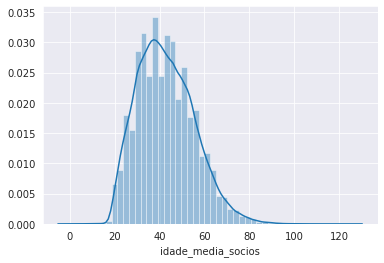

In [ ]:
market['idade_media_socios'].value_counts()
sns.distplot(market['idade_media_socios'])

market['idade_media_socios'][market['idade_media_socios'] < 0]
#só um ponto menor que 0

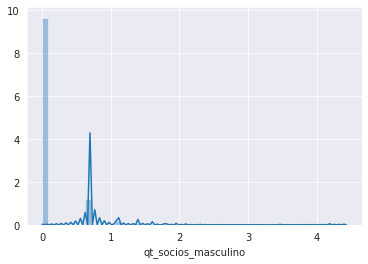

In [ ]:
variavel = 'qt_socios_masculino'
# market[variavel].value_counts()
# sns.distplot(market[variavel])
sns.distplot(np.log(market[variavel]))
#talvez escalar as variáveis ou um log para dar uma balanceada. 
#Principalmente essas

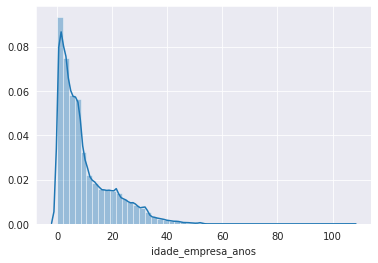

In [ ]:
sns.distplot(market['idade_empresa_anos'])
#dar uma olhada na categoria de idades

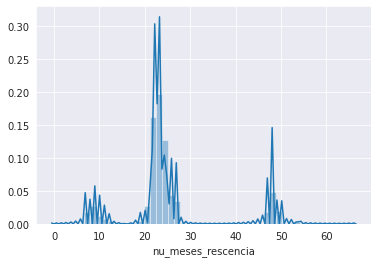

In [ ]:
market['nu_meses_rescencia'].value_counts()
sns.distplot(market['nu_meses_rescencia'])
#parecem ser três distribuições

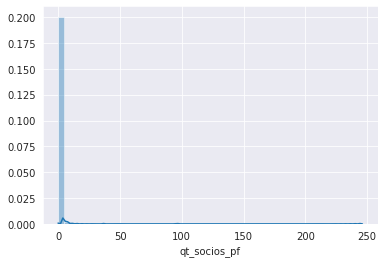

In [ ]:
market['qt_socios_pj'].value_counts()
sns.distplot(market['qt_socios_pf'])
#valores muito concentrados nas variáveis

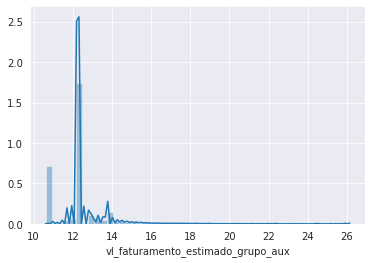

In [ ]:
variavel = 'vl_faturamento_estimado_grupo_aux'
# market[variavel].value_counts()
# sns.distplot(market[variavel])
sns.distplot(np.log(market[variavel]))
#acho a categórica melhor

#Variáveis categóricas

In [ ]:
market.describe(include="object")

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,fl_rm,nm_divisao,nm_segmento,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,462298,462298,462298,462298,460371,462298,462292,462298,460371,460371,379585,379585,460359,447447,447447,451130,403600,403600,460371,434785,434785
unique,67,6,7,33,5,6,7334,2,87,21,2,2,27,6,5,4,19,73,2,12,11
top,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,1 a 5,2005-11-03,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,True,False,MA,VERDE,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
freq,295756,127654,320211,172404,211224,138580,69465,236779,172404,211224,199617,285545,124823,145430,378896,217949,71469,60008,264741,273861,252602


Usar variáveis com valores menores.

* natureza_juridica_macro, não de_natureza_juridica
* setor e não, de_ramo
* idade_emp_cat talvez a se considerar num algoritmo de árvore
* dt_situação não é muito útil
* nm_segmento e não nm_divisão
* fl_veiculo relevante com outras features
* tirar nm_micro_regiao
* ver quanto de faixa e de faixa grupo são parecidos

In [ ]:
market['de_natureza_juridica'].value_counts()


EMPRESARIO INDIVIDUAL                                                     295756
SOCIEDADE EMPRESARIA LIMITADA                                              91231
ASSOCIACAO PRIVADA                                                         29694
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA     15183
ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO                                  7301
                                                                           ...  
ORGAO DE DIRECAO NACIONAL DE PARTIDO POLITICO                                  1
FUNDO PRIVADO                                                                  1
CONSORCIO DE EMPREGADORES                                                      1
CONSORCIO PUBLICO DE DIREITO PRIVADO                                           1
SOCIEDADE SIMPLES EM NOME COLETIVO                                             1
Name: de_natureza_juridica, Length: 67, dtype: int64

In [ ]:
market['natureza_juridica_macro'].value_counts()
#muito melhor usar essa outra. Talves eliminar as menos comuns inclusive

OUTROS                            320211
ENTIDADES EMPRESARIAIS             99241
ENTIDADES SEM FINS LUCRATIVOS      37089
ADMINISTRACAO PUBLICA               2912
CARGO POLITICO                      1617
PESSOAS FISICAS                     1225
INSTITUICOES EXTRATERRITORIAIS         3
Name: natureza_juridica_macro, dtype: int64

In [ ]:
market['de_ramo'].value_counts()
market['setor'].value_counts()

COMERCIO            211224
SERVIÇO             189644
INDUSTRIA            30893
CONSTRUÇÃO CIVIL     25363
AGROPECUARIA          3247
Name: setor, dtype: int64

In [ ]:
market['dt_situacao'].value_counts()
#possível marcada para uma melhoria do modelo. Transformar ela em numérica talvez
#ou em ano

market['dt_situacao'].str.extract('(\d{2})', expand=False).value_counts()
#possível ideia pela década ou anos

20    458318
19      3974
Name: dt_situacao, dtype: int64

In [ ]:
market['nm_micro_regiao'].value_counts()
#tirar mesmo

MANAUS                            60008
NATAL                             46745
AGLOMERACAO URBANA DE SAO LUIS    45875
TERESINA                          33887
IMPERATRIZ                        15912
                                  ...  
BERTOLINIA                          854
PIO IX                              823
PURUS                               757
MEDIO OESTE                         562
JAPURA                              190
Name: nm_micro_regiao, Length: 73, dtype: int64

In [ ]:
market['nm_meso_regiao'].value_counts()
#preciso mesmo de estado tendo essa variável?

CENTRO AMAZONENSE         71469
NORTE MARANHENSE          61331
LESTE POTIGUAR            58762
CENTRO NORTE PIAUIENSE    42244
OESTE MARANHENSE          26796
OESTE POTIGUAR            20860
LESTE MARANHENSE          17651
VALE DO ACRE              16539
CENTRO MARANHENSE         13755
SUDOESTE PIAUIENSE        12180
NORTE PIAUIENSE           11919
CENTRAL POTIGUAR          10681
SUDESTE PIAUIENSE         10049
AGRESTE POTIGUAR           7845
SUL MARANHENSE             7382
SUL AMAZONENSE             4931
VALE DO JURUA              3900
SUDOESTE AMAZONENSE        3738
NORTE AMAZONENSE           1568
Name: nm_meso_regiao, dtype: int64

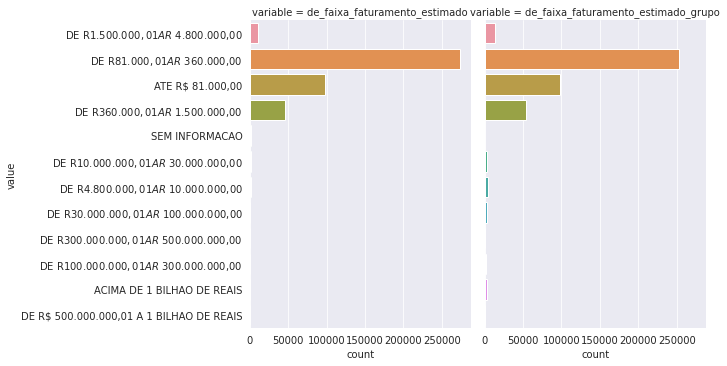

In [ ]:
sns.catplot(y='value', data=pd.melt(market[['de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo']]), col='variable', kind='count')
#quase igual. Talvez vale uma variável se tão na mesma categoria ou não

In [ ]:
faixa_faturamento_igual = market['de_faixa_faturamento_estimado'] == market['de_faixa_faturamento_estimado_grupo']

In [ ]:
market['sg_uf'] == market['sg_uf_matriz']

0         True
1         True
2         True
3         True
4         True
          ... 
462293    True
462294    True
462295    True
462296    True
462297    True
Length: 462298, dtype: bool

# Decisões para baseline


## Variáveis para remover:
'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia', 'qt_socios_pf', 'qt_socios_pj', 'vl_faturamento_estimado_grupo_aux', de_natureza_juridica, 'de_ramo', 'nm_divisao', 'dt_situacao', nm_micro_regiao


## Variáveis para transformar

faixa_faturamento_igual = market['de_faixa_faturamento_estimado'] == market['de_faixa_faturamento_estimado_grupo']

depois retirar 'faixa_faturamento_grupo'


## Transformações gerais

* Nenhuma variável tem valores menores que zero. Fazer esses valores serem 0
* log/normalização ou normalização/padronização
* 

# Baseline

## Pré processamento

In [ ]:
# to_drop = ['nu_meses_rescencia', 'qt_socios_pf', 'qt_socios_pj', 
#            'vl_faturamento_estimado_grupo_aux', 'de_natureza_juridica', 
#            'de_ramo', 'nm_divisao', 'dt_situacao', 'nm_micro_regiao', 
#            'idade_empresa_anos', 'sg_uf_matriz', 'qt_socios_feminino'
#            , 'de_faixa_faturamento_estimado_grupo']

to_drop = ['vl_faturamento_estimado_grupo_aux', 'de_natureza_juridica', 
           'de_ramo', 'nm_divisao', 'dt_situacao', 'nm_micro_regiao', 
           'sg_uf_matriz', 'qt_socios_feminino'
           , 'de_faixa_faturamento_estimado_grupo']

market_reduced = market.drop(to_drop, axis=1)

NameError: ignored

Transformar valor negativo, -2, em 0.

In [ ]:
market_reduced.replace(-2, 0, inplace=True)

NameError: ignored

## Pipeline de pré processamento


In [ ]:
categorical_cols = [cname for cname in market_reduced.columns if 
                    market_reduced[cname].nunique() < 15 and 
                    market_reduced[cname].dtype == "object"]

# Seleciona as variáveis numéricas
numerical_cols = [cname for cname in market_reduced.columns if 
                market_reduced[cname].dtype in ['int64', 'bool', 'float64']]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

# Preprocessamento de variáveis numéricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessamento de dados categóricos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MaxAbsScaler())
])

# Pipeline com processamentos
preprocessor_pipeline = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


pca_transformer = PCA(n_components=.9)
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor_pipeline),
                      ('pca', pca_transformer)
                     ])

In [ ]:
market_reduced[categorical_cols] = market_reduced[categorical_cols].fillna(
    value=market_reduced[categorical_cols].mode().iloc[0])

In [ ]:
pca_result = full_pipeline.fit_transform(market_reduced[numerical_cols])

In [ ]:
selected_companies = portifolio2.iloc[0:100, 1]
test_indexes = market_initial[market_initial['id'].isin(selected_companies)].index

In [ ]:
# np.linalg.norm(df[['lat', 'long']].sub(np.array(L1)), axis=1)
distance_result = [pd.Series(np.linalg.norm((pca_result - pca_result[test_index]), axis=1)) for test_index in test_indexes]

In [ ]:
# distance_result_df = pd.DataFrame(distance_result)
distance_result_df = pd.concat(distance_result, axis=1)

In [ ]:
result_indexes = distance_result_df.median(axis=1).sort_values()[0:1000].index

In [ ]:
portifolio_list_1 = pd.DataFrame({'id':market_initial['id'], 
              'distance': distance_result_df.median(axis=1)}).sort_values(
                  'distance')

In [ ]:
np.intersect1d(portifolio2['id'], portifolio_list_1.iloc[result_indexes, 0]).shape

(0,)

In [ ]:
portifolio_list_1.iloc[0:1000, 0]

604       32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...
274348    a54b86764b45588620443b9aa39bfcbeca4f5a297994f9...
328831    82abf02265754edb1bcacdb8b4c92b8cca373b22b82a78...
189066    c5e918707327fe5e5ef4fba053e818c5df054674e3c853...
279429    d64e2681f1a199af3f3102b8525187c6bbd53e037c226a...
                                ...                        
447868    dd4205337a258c846042683a26dd992fb1edcdec1fffb5...
136534    bfad933bc8787d82c43c6c9a206bf1781b84c5eea06203...
214825    78fe9301cbd59fc873bf7c07e398c0598134d9991947bb...
294626    fd1e7d563ce835c3c18a9fd950b11b9ea5f311a4926177...
67373     a9968dac592bcc54bedb717252ca5e1e2547a8f26ca134...
Name: id, Length: 1000, dtype: object

In [ ]:
market_initial[market_initial['id'] == portifolio1.iloc[1, 1]].index

Int64Index([604], dtype='int64')